In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
y = df_train.iloc[:, 0]
X = df_train.iloc[:, 1:]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, shuffle= True)

df_test = pd.read_csv('test.csv') #Just x, no y


<AxesSubplot:xlabel='label', ylabel='count'>

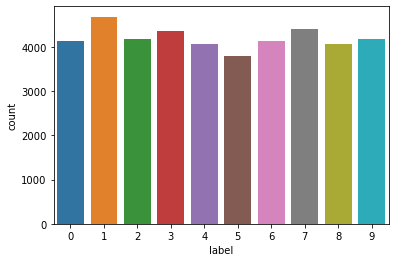

In [ ]:
sns.countplot(x = y)

Uniform Distribution of labels

In [ ]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227827,0.130268,0.064226,0.021429,0.021548,0.003571,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.578347,4.818621,3.437205,1.839529,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


We can already see from the truncated display of the describe method, that there are some pixels which are mostly irrelevant to the data set-- The first 10 pixels are always 0, for example.

We should also consider normalizing the data, as opposed to leaving it at 0-255

#### Mean Images

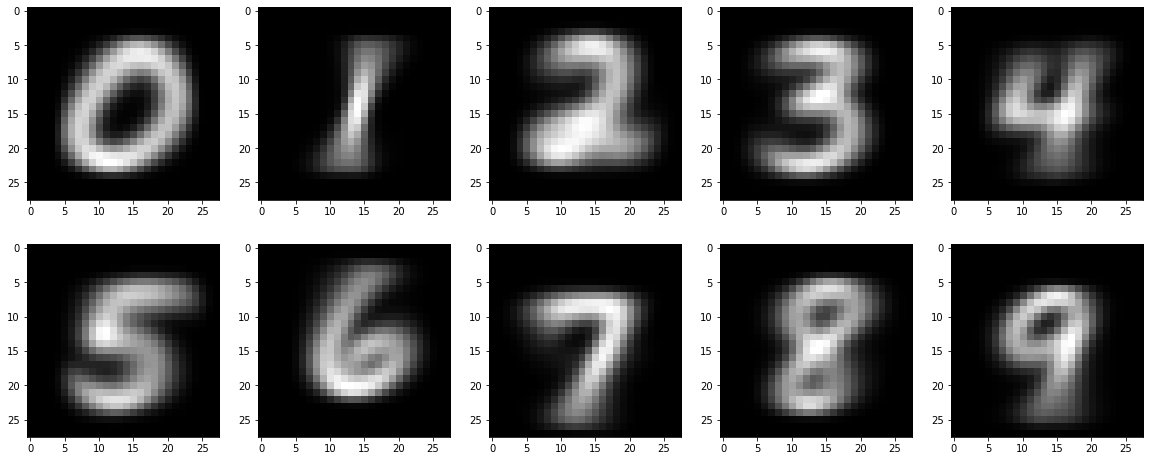

In [ ]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    plt.subplot(2,5, i+1)
    images = np.array(np.mean(X[y == i], axis =0)).reshape(28,28)
    plt.imshow(images, 'gray')


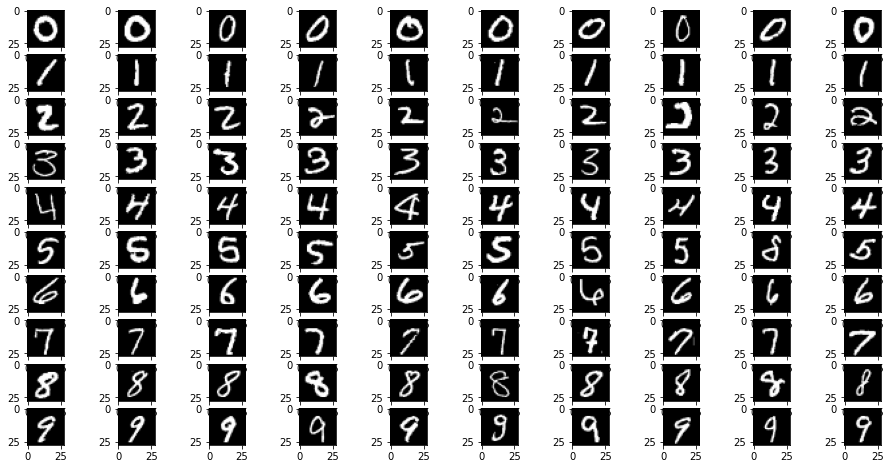

In [7]:
fig = plt.figure(figsize= (16,8))
x = 1
for i in range(10):
    digit = np.array(X[y==i])
    for j in range(10):
        number = digit[j].reshape(28,28)
        plt.subplot(10,10, x)
        plt.imshow(number, 'gray')
        x+=1

We can see, there is some high variance in the drawings of each digit: There are some 4's which could understandably be mistaken for a 9, 5's for 6's, and there are some 6's which even look like 4's.

# Modeling

### Multinomial Bayes-- Baseline Prediction

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB(alpha = 0.1)
NB.fit(x_train, y_train)
print(classification_report(y_val, NB.predict(x_val)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       805
           1       0.88      0.93      0.91       901
           2       0.90      0.84      0.87       810
           3       0.80      0.81      0.80       836
           4       0.86      0.74      0.79       873
           5       0.85      0.69      0.76       757
           6       0.90      0.91      0.91       884
           7       0.94      0.82      0.87       872
           8       0.65      0.80      0.72       812
           9       0.69      0.84      0.76       850

    accuracy                           0.83      8400
   macro avg       0.84      0.83      0.83      8400
weighted avg       0.84      0.83      0.83      8400



### KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(classification_report(y_val, knn.predict(x_val)))


C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       840
           1       0.94      1.00      0.97       891
           2       0.98      0.96      0.97       802
           3       0.96      0.97      0.96       863
           4       0.98      0.96      0.97       856
           5       0.95      0.96      0.95       766
           6       0.98      0.98      0.98       837
           7       0.96      0.96      0.96       894
           8       0.99      0.91      0.95       830
           9       0.94      0.95      0.94       821

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
grid_cv = GridSearchCV( KNeighborsClassifier(),
                param_grid= {'n_neighbors': np.arange(start = 1, stop = 29, step = 2)},
                cv = 5);


grid_cv.fit(x_train, y_train);

In [51]:
k = grid_cv.best_params_.get('n_neighbors')
knn = KNeighborsClassifier(k).fit(x_train, y_train)
train_pred = knn.predict(x_train)
val_pred = knn.predict(x_val)
print(f'With k ={k}:')
print(f'accuracy score on the train set = {accuracy_score(y_train, train_pred)}')
print(f'accuracy score on the validation set = {accuracy_score(y_val, val_pred)}')
print(f'F1 score on the validation set= {f1_score(y_val, val_pred, average = "macro")}')


C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
knn = KNeighborsClassifier(3).fit(X, y)
knn_pred = knn.predict(df_test)
knn_pred

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [57]:
sample = pd.read_csv('sample_submission.csv').set_index('ImageId')
sample.loc[:, 'Label'] = knn_pred
sample.to_csv('knn_submission')

NameError: name 'knn_pred' is not defined

### Regression

In [6]:
x_log_train, x_rem, y_log_train, y_rem = train_test_split(x_train, y_train, train_size= 0.1, shuffle = True)

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter= 1000).fit(x_log_train, y_log_train)
print(classification_report(y_val, lr.predict(x_val)))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       805
           1       0.94      0.96      0.95       901
           2       0.80      0.83      0.82       810
           3       0.82      0.83      0.83       836
           4       0.88      0.85      0.86       873
           5       0.79      0.77      0.78       757
           6       0.90      0.92      0.91       884
           7       0.88      0.88      0.88       872
           8       0.81      0.78      0.79       812
           9       0.83      0.81      0.82       850

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400



C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [63]:
parameters = { 'penalty': ['l2', 'elasticnet'],
                'solver' :['lbfgs', 'newton_cg', 'saga'] }
clf = GridSearchCV(LogisticRegression(max_iter= 1000), param_grid = parameters, cv = 3, verbose = True)


In [70]:
clf.fit(x_log_train, y_log_train)
clf.best_params_

{'penalty': 'l2', 'solver': 'saga'}

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression('l2', solver = 'saga', max_iter= 500)
lr.fit(x_train, y_train)


In [ ]:
print(classification_report(y_val, lr.predict(x_val)))

### Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       824
           1       0.98      0.98      0.98       937
           2       0.96      0.97      0.96       792
           3       0.96      0.94      0.95       905
           4       0.95      0.98      0.97       808
           5       0.96      0.96      0.96       758
           6       0.97      0.98      0.98       824
           7       0.97      0.96      0.97       875
           8       0.94      0.95      0.95       816
           9       0.96      0.94      0.95       861

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [4]:
rf = RandomForestClassifier(oob_score=True).fit(x_train, y_train)
rf.oob_score_

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.9582142857142857

In [ ]:
parameters = {'n_estimators': [100,400], 'max_depth': [None, 10, 70], 'max_features': [None, 50,100]}
clf = GridSearchCV(RandomForestClassifier(n_jobs= -1), parameters)
clf.fit(x_train, y_train)

In [11]:
print(classification_report(y_val, clf.best_estimator_.predict(x_val)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       824
           1       0.98      0.98      0.98       937
           2       0.96      0.97      0.96       792
           3       0.96      0.95      0.95       905
           4       0.96      0.98      0.97       808
           5       0.96      0.96      0.96       758
           6       0.98      0.98      0.98       824
           7       0.98      0.96      0.97       875
           8       0.95      0.95      0.95       816
           9       0.96      0.94      0.95       861

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [51]:
rf = RandomForestClassifier(n_estimators= 400, max_depth= 70, max_features= 50, n_jobs= -1, oob_score = True).fit(x_train, y_train)

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [52]:
print(classification_report(y_val, rf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       824
           1       0.98      0.98      0.98       937
           2       0.96      0.96      0.96       792
           3       0.97      0.95      0.96       905
           4       0.96      0.98      0.97       808
           5       0.96      0.96      0.96       758
           6       0.98      0.98      0.98       824
           7       0.97      0.97      0.97       875
           8       0.95      0.95      0.95       816
           9       0.96      0.94      0.95       861

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [53]:
print(rf.oob_score_)
f1_score(y_val,  rf.predict(x_val), average = 'macro')

0.9655059523809524


0.9670979291083878

In [170]:
rf = RandomForestClassifier(n_estimators= 400, max_depth= 70, max_features= 50, n_jobs= -1, oob_score = True).fit(X, y)
rf_pred = rf.predict(df_test)
sample = pd.read_csv('sample_submission.csv').set_index('ImageId')
sample.loc[:, 'Label'] = rf_pred
sample.to_csv('RandomForest_submission')

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### Stacking

In [88]:
y_train.unique()

array([0, 7, 8, 6, 1, 3, 2, 9, 4, 5], dtype=int64)

### PCA-- KNN

In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_train = scale.fit_transform(x_train)
pca = PCA(2).fit_transform(scaled_train)

<AxesSubplot:>

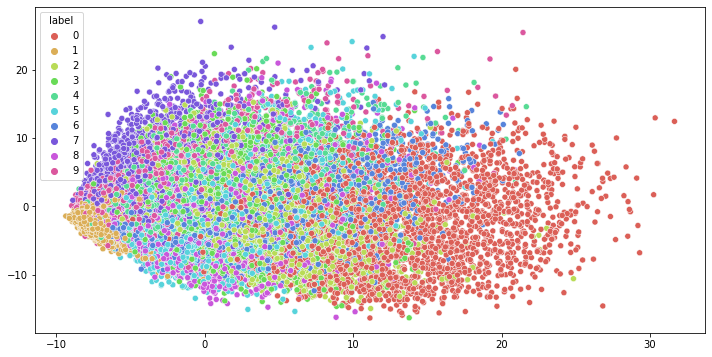

In [91]:
fig = plt.figure(figsize= (12,6))
sns.scatterplot(x = pca[:,0], y = pca[:, 1], hue= y_train, palette = sns.hls_palette(10), legend = 'full')

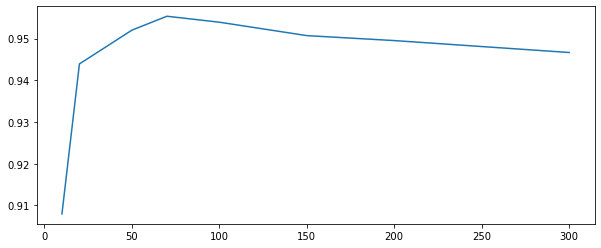

In [131]:
components = [10, 20,50,70,100,150, 200,300,]
accs = []
for c in  components:

    pca_knn = PCA(c)
    pca_x_train = pca_knn.fit_transform(scaled_train)
    knn = KNeighborsClassifier(5).fit(pca_x_train, y_train)
    x_val_pca = scale.transform(x_val)
    x_val_pca = pca_knn.transform(x_val_pca)

    accs.append(accuracy_score(y_val, knn.predict(x_val_pca)))
fig = plt.figure(figsize = (10,4))
plt.plot(components, accs)

In [132]:
pca_knn = PCA(100)
pca_x_train = pca_knn.fit_transform(scaled_train)
knn = KNeighborsClassifier(5).fit(pca_x_train, y_train)
x_val_pca = scale.transform(x_val)
x_val_pca = pca_knn.transform(x_val_pca)
print(accuracy_score(y_val, knn.predict(x_val_pca)))
print(f1_score(y_val, knn.predict(x_val_pca), average = 'macro'))

0.9554761904761905
0.954973002660833


### T-SNE

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

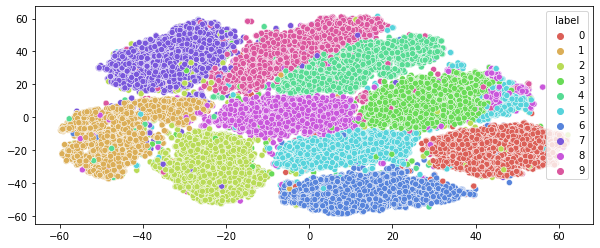

In [134]:
from sklearn.manifold import TSNE

t = TSNE(2, n_jobs = -1)
tsne = t.fit_transform(X)
fig = plt.figure(figsize = (10,4))
sns.scatterplot(tsne[:,0], tsne[:,1], hue = y, palette = sns.hls_palette(10), legend = 'full')

In [135]:
x_tsne, x_tsne_val, y_tsne, y_tsne_val = train_test_split(tsne, y, train_size = 0.8)

In [154]:
knn_tsne = KNeighborsClassifier(3).fit(x_tsne, y_tsne)
print(accuracy_score(y_tsne_val, knn_tsne.predict(x_tsne_val)))

0.9655952380952381


In [167]:
rf_tsne = RandomForestClassifier(n_estimators= 400, n_jobs = -1, oob_score= True)
rf_tsne.fit(x_tsne, y_tsne)
print(rf_tsne.oob_score_)

0.9691666666666666


In [169]:
rf_tsne = RandomForestClassifier(n_estimators= 400, n_jobs = -1, oob_score= True)
rf_tsne.fit(tsne, y)

x_tsne_test = t.fit_transform(df_test)
rf_tsne_pred = rf_tsne.predict(x_tsne_test)

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [171]:
sample = pd.read_csv('sample_submission.csv').set_index('ImageId')
sample.loc[:, 'Label'] = rf_tsne_pred
sample.to_csv('TSNE_RandomForest_submission')